In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

,Date,US Tech Equities,US Equities,Japan Equities,Euro Equities,UK Equities,EM Equities,US 2Y Bond,US 10Y Bond,Germany 10Y Bond,...,BCOM Gold,Oil Brent,Copper,FX AUD/USD,FX CAD/USD,FX CHF/USD,FX EUR/USD,FX GBP/USD,FX JPY/USD,FundReturn
0,2004-12-31,0.000307,-0.000824,0.000000,0.000000,-0.003117,0.000000,0.000671,0.002378,0.000000,...,0.000000,-0.004903,0.004816,0.008432,0.006450,-0.003272,-0.002713,-0.000640,0.005508,0.001841
1,2005-01-03,-0.007984,-0.006179,0.000000,0.008480,0.000000,0.000000,-0.000447,-0.000558,0.002952,...,-0.019845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002598
2,2005-01-04,-0.020426,-0.012642,0.005226,-0.003027,0.007712,-0.011075,-0.001790,-0.004189,-0.000757,...,-0.001163,0.010594,-0.075240,-0.019535,-0.020867,-0.025482,-0.022043,-0.018944,-0.018110,-0.004648
3,2005-01-05,-0.010744,-0.006507,-0.009532,0.000674,-0.005689,-0.014442,-0.000150,0.000000,0.000421,...,-0.004427,-0.017796,0.020209,-0.002257,-0.000631,-0.000974,-0.001206,0.002419,0.004751,-0.002888
4,2005-01-06,-0.001597,0.004226,0.004375,0.005058,0.001664,-0.013244,0.000597,0.000701,0.001094,...,-0.013340,0.049144,-0.005416,-0.007047,-0.007596,-0.007000,-0.007908,-0.006461,-0.011828,-0.001049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,2019-12-24,0.000204,0.000009,0.000420,0.000000,0.001873,0.000000,0.000000,0.000000,0.000000,...,0.010815,0.011221,0.004115,0.001437,0.001381,0.001261,-0.000159,0.002684,0.000396,0.000078
3775,2019-12-26,0.008403,0.004331,0.002946,0.000000,0.000000,0.005130,0.000254,0.001402,0.000000,...,0.006380,0.008786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000062
3776,2019-12-27,-0.000656,-0.000040,0.000420,0.000950,0.001099,0.002245,0.000508,0.001887,-0.000320,...,0.002443,0.001069,-0.000321,0.007842,0.005193,0.004575,0.006436,0.009658,-0.002710,0.002107
3777,2019-12-30,-0.007174,-0.005624,-0.008390,-0.010768,-0.006273,-0.006413,0.000127,-0.001519,-0.004632,...,0.000329,-0.002136,0.000803,0.001944,0.002124,0.006358,0.003261,0.001547,0.005397,-0.000433


In [5]:
test

,Date,US Tech Equities,US Equities,Japan Equities,Euro Equities,UK Equities,EM Equities,US 2Y Bond,US 10Y Bond,Germany 10Y Bond,...,Canada 10Y Bond,BCOM Gold,Oil Brent,Copper,FX AUD/USD,FX CAD/USD,FX CHF/USD,FX EUR/USD,FX GBP/USD,FX JPY/USD
0,2019-12-31,-0.001095,0.002567,0.000000,0.000000,-0.005270,0.002339,0.000036,-0.000486,0.000000,...,-0.000381,0.002964,-0.010707,-0.007309,0.004691,0.006703,0.000565,0.001873,0.010180,0.002857
1,2020-01-02,0.019111,0.008065,0.000000,0.013880,0.006445,0.020140,0.000236,0.002252,0.000557,...,0.003302,0.003283,0.004484,0.002305,-0.003961,-0.001027,-0.000796,-0.002353,-0.004600,0.003631
2,2020-01-03,-0.007579,-0.005759,0.000000,-0.006799,0.000780,-0.017917,0.000725,0.004615,0.007487,...,0.005045,0.015902,0.032015,-0.009526,-0.006612,-0.000151,-0.001585,-0.003269,-0.008893,0.002333
3,2020-01-06,0.005250,0.002421,-0.022842,-0.003809,-0.006067,-0.003265,0.000018,0.001332,0.001365,...,0.002391,0.010564,0.004026,0.001222,-0.003374,0.000618,0.001852,0.002137,0.006811,-0.002715
4,2020-01-07,-0.000130,-0.002205,0.016450,0.002459,0.000383,0.000137,-0.000163,-0.001389,-0.000957,...,-0.002188,0.003506,-0.006684,0.001628,-0.009342,-0.003367,-0.003268,-0.004356,-0.003029,-0.002899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2023-02-17,-0.007694,-0.004115,-0.007590,-0.006107,-0.002268,-0.011041,-0.000288,-0.000487,-0.001672,...,-0.001813,-0.000864,-0.024340,-0.003845,-0.003349,-0.003013,-0.001831,-0.000894,-0.001087,-0.000969
804,2023-02-20,0.000000,0.000000,0.002185,-0.000470,0.002294,0.000367,0.000000,0.000000,0.005953,...,0.000000,0.000000,0.000000,0.000000,0.009047,0.002700,0.004699,0.002175,0.002550,0.001907
805,2023-02-21,-0.023664,-0.019159,-0.002543,-0.005029,-0.004474,-0.012810,-0.001198,-0.005245,-0.007027,...,-0.006735,-0.004162,0.001589,0.023747,-0.003583,-0.002921,-0.002859,-0.000439,0.009110,-0.005130
806,2023-02-22,-0.000736,-0.003398,-0.011658,-0.002625,-0.007009,-0.006416,0.000067,0.000141,-0.002459,...,-0.000586,-0.000543,-0.025885,-0.009616,-0.010318,-0.003311,-0.004453,-0.005250,-0.006069,0.000376


In [6]:
X_train=train.copy()
y_train=X_train['FundReturn']
X_test=test.copy()

In [7]:
X_train=X_train.drop(columns=['Date'])
X_train=X_train.drop(columns=['FundReturn'])

In [8]:
X_train

,US Tech Equities,US Equities,Japan Equities,Euro Equities,UK Equities,EM Equities,US 2Y Bond,US 10Y Bond,Germany 10Y Bond,UK 10Y Bond,...,Canada 10Y Bond,BCOM Gold,Oil Brent,Copper,FX AUD/USD,FX CAD/USD,FX CHF/USD,FX EUR/USD,FX GBP/USD,FX JPY/USD
0,0.000307,-0.000824,0.000000,0.000000,-0.003117,0.000000,0.000671,0.002378,0.000000,0.003149,...,0.003396,0.000000,-0.004903,0.004816,0.008432,0.006450,-0.003272,-0.002713,-0.000640,0.005508
1,-0.007984,-0.006179,0.000000,0.008480,0.000000,0.000000,-0.000447,-0.000558,0.002952,0.000000,...,0.000000,-0.019845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.020426,-0.012642,0.005226,-0.003027,0.007712,-0.011075,-0.001790,-0.004189,-0.000757,0.000628,...,-0.003474,-0.001163,0.010594,-0.075240,-0.019535,-0.020867,-0.025482,-0.022043,-0.018944,-0.018110
3,-0.010744,-0.006507,-0.009532,0.000674,-0.005689,-0.014442,-0.000150,0.000000,0.000421,-0.001434,...,0.001519,-0.004427,-0.017796,0.020209,-0.002257,-0.000631,-0.000974,-0.001206,0.002419,0.004751
4,-0.001597,0.004226,0.004375,0.005058,0.001664,-0.013244,0.000597,0.000701,0.001094,0.002244,...,0.000536,-0.013340,0.049144,-0.005416,-0.007047,-0.007596,-0.007000,-0.007908,-0.006461,-0.011828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,0.000204,0.000009,0.000420,0.000000,0.001873,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.001083,0.010815,0.011221,0.004115,0.001437,0.001381,0.001261,-0.000159,0.002684,0.000396
3775,0.008403,0.004331,0.002946,0.000000,0.000000,0.005130,0.000254,0.001402,0.000000,0.000000,...,0.000000,0.006380,0.008786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3776,-0.000656,-0.000040,0.000420,0.000950,0.001099,0.002245,0.000508,0.001887,-0.000320,0.000607,...,0.002458,0.002443,0.001069,-0.000321,0.007842,0.005193,0.004575,0.006436,0.009658,-0.002710
3777,-0.007174,-0.005624,-0.008390,-0.010768,-0.006273,-0.006413,0.000127,-0.001519,-0.004632,-0.008030,...,-0.005644,0.000329,-0.002136,0.000803,0.001944,0.002124,0.006358,0.003261,0.001547,0.005397


In [9]:
X_test=X_test.drop(columns=['Date'])

In [10]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train,
                      test_size = 0.3, random_state = 123)

## XGBoost

In [11]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 40,seed= 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  

[06:44:23] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
# Fitting the model
pred

array([ 0.00184526, -0.00177734,  0.00243612, ...,  0.00105804,
       -0.0007306 , -0.00088996], dtype=float32)

In [13]:
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.001567


In [14]:
# Prediction for competition

In [15]:
# Predict the model
xgb_pred = xgb_r.predict(X_test)

In [16]:
solution = pd.DataFrame({"Date":test.Date, "FundReturn":xgb_pred})
solution.to_csv("submission.csv", index = False)

In [17]:
solution

,Date,FundReturn
0,2019-12-31,0.000392
1,2020-01-02,0.002059
2,2020-01-03,-0.000227
3,2020-01-06,-0.000216
4,2020-01-07,0.000565
...,...,...
803,2023-02-17,-0.001542
804,2023-02-20,-0.000009
805,2023-02-21,-0.003571
806,2023-02-22,-0.001270


##  DataViz


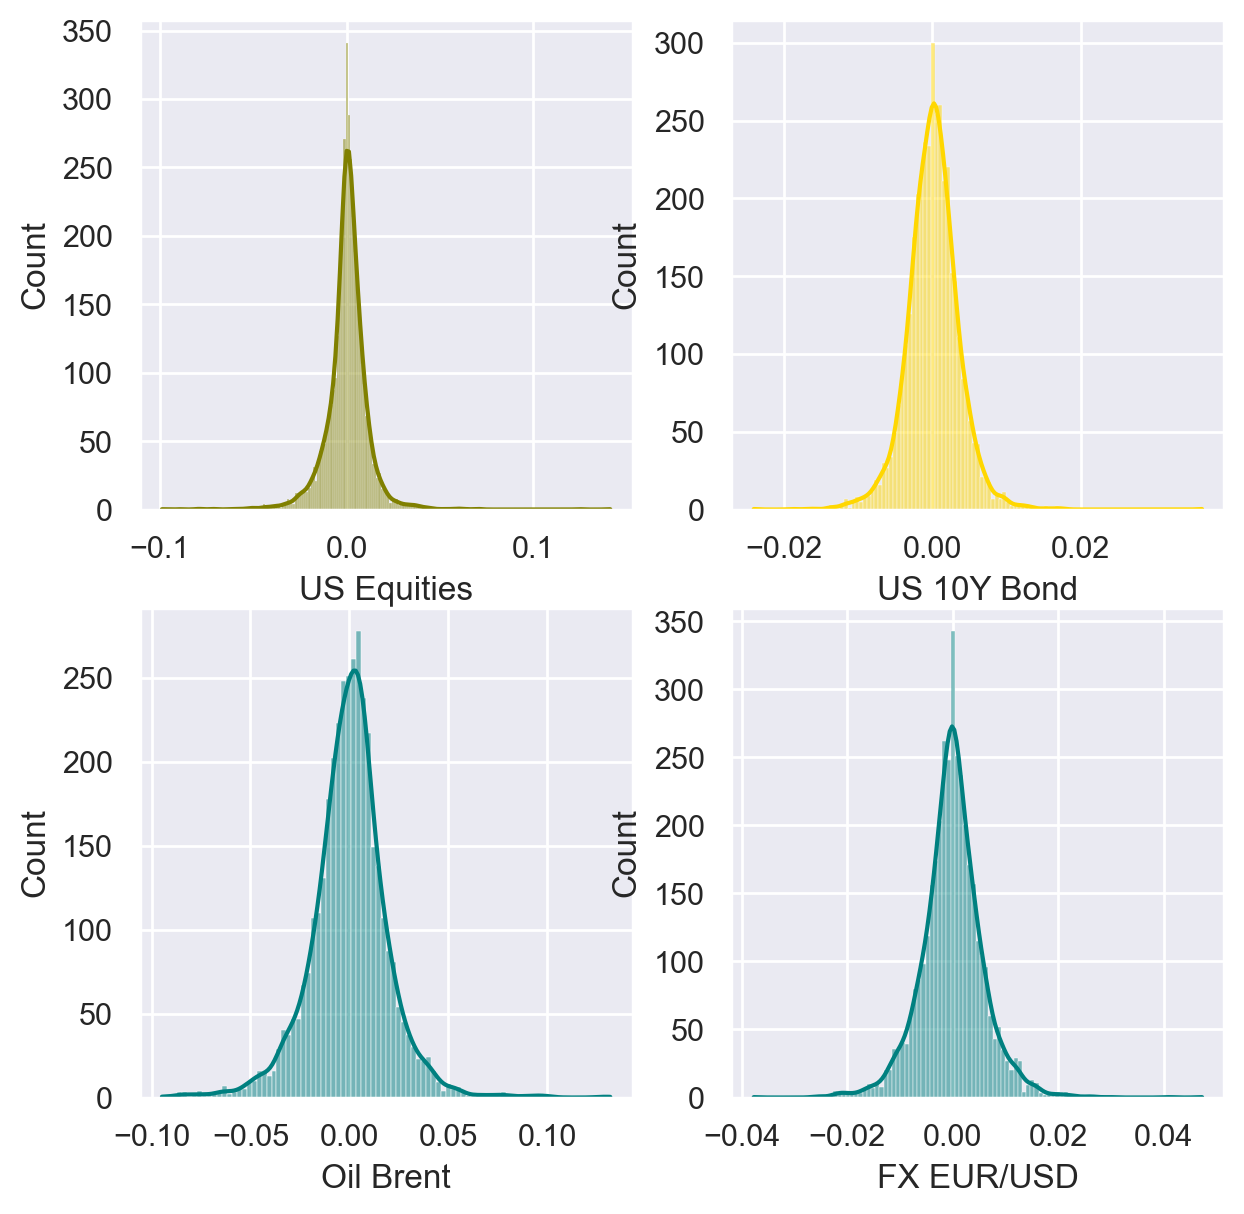

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=train, x="US Equities", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=train, x="US 10Y Bond", kde=True, color="gold", ax=axs[0, 1])
sns.histplot(data=train, x="Oil Brent", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=train, x="FX EUR/USD", kde=True, color="teal", ax=axs[1, 1])

plt.show()


In [19]:
from pandas_profiling import ProfileReport

In [20]:
report=ProfileReport(train)
report.to_file(output_file='rapport.html')

Export report to file: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.71it/s]


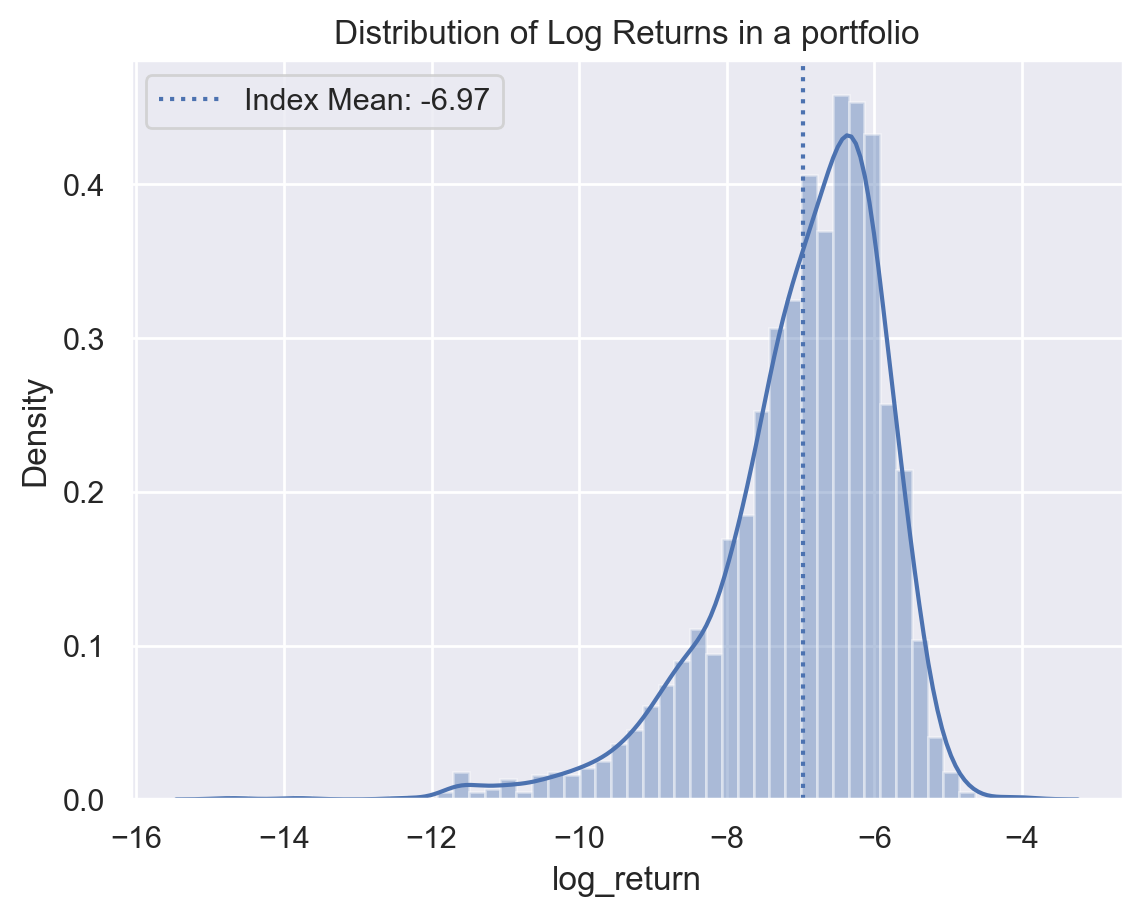

In [21]:
import matplotlib.pyplot as plt

train['log_return']=np.log(train.FundReturn)

sns.distplot(train.log_return)
mean_return = train.log_return.mean()
plt.title('Distribution of Log Returns in a portfolio')
plt.axvline(mean_return, ls=':', label='Index Mean: {}'.format(round(mean_return, 2)))
plt.legend()

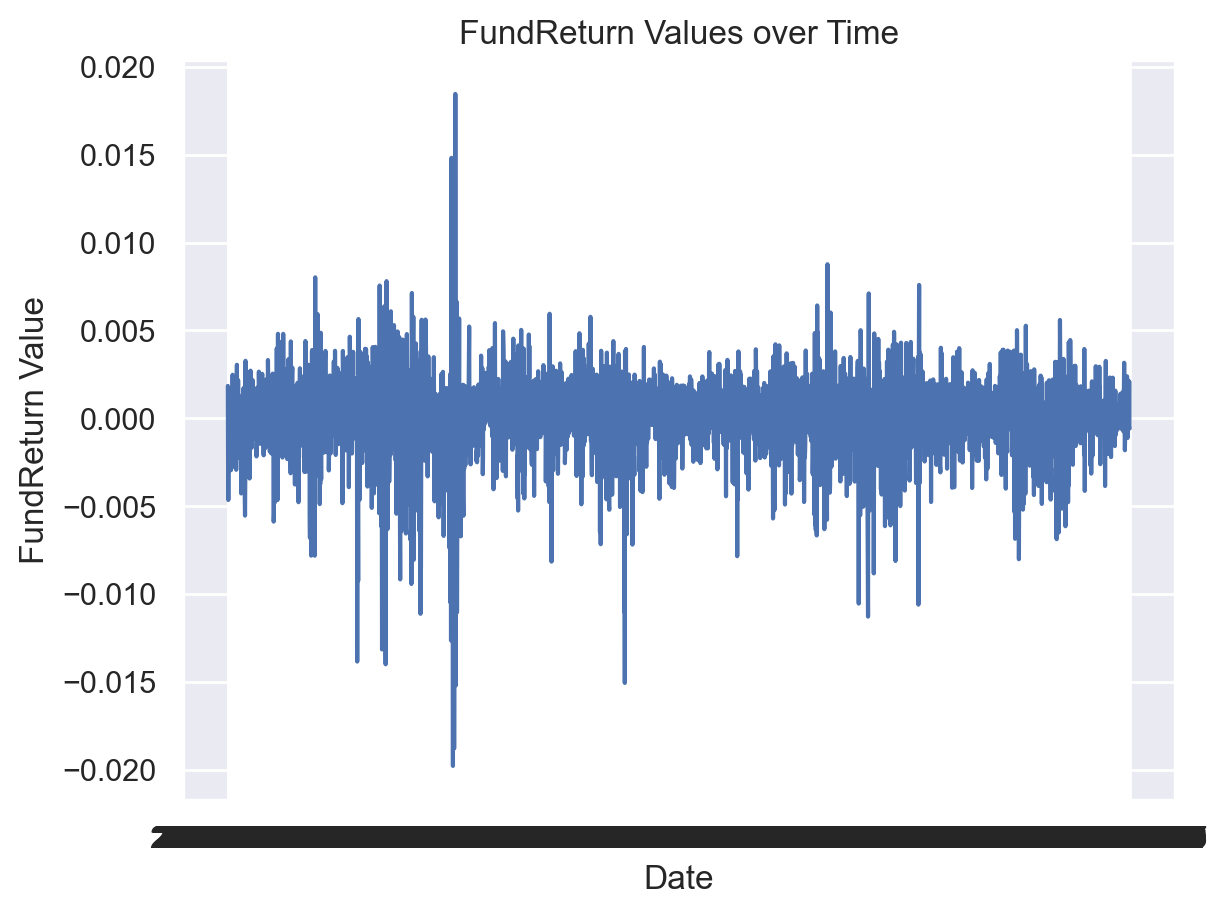

In [22]:
plt.plot(train['Date'], train['FundReturn'])
plt.xlabel('Date')
plt.ylabel('FundReturn Value')
plt.title('FundReturn Values over Time')
plt.show()

### Features engineering

* Add Date variables

In [665]:
X_train=train.copy()
X_test=test.copy()

In [666]:
# Converting to datetime datatype
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_train['Date_year'] = X_train['Date'].dt.year
X_train['Date_month'] = X_train['Date'].dt.month
#X_train['Date_month_name'] = X_train['Date'].dt.month_name()
X_train['Date_day'] = X_train['Date'].dt.day
X_train['Date_dow'] = X_train['Date'].dt.dayofweek
#X_train['Date_dow_name'] = X_train['Date'].dt.day_name
#X_train['Date_is_weekend'] = np.where(X_train['Date_dow_name'].isin(['Sunday', 'Saturday']),1,0)
X_train['Date_week'] = X_train['Date'].dt.week
X_train['quarter'] = X_train['Date'].dt.quarter
X_train['semester'] = np.where(X_train['quarter'].isin([1,2]), 1, 2)

* add missing dates using smote

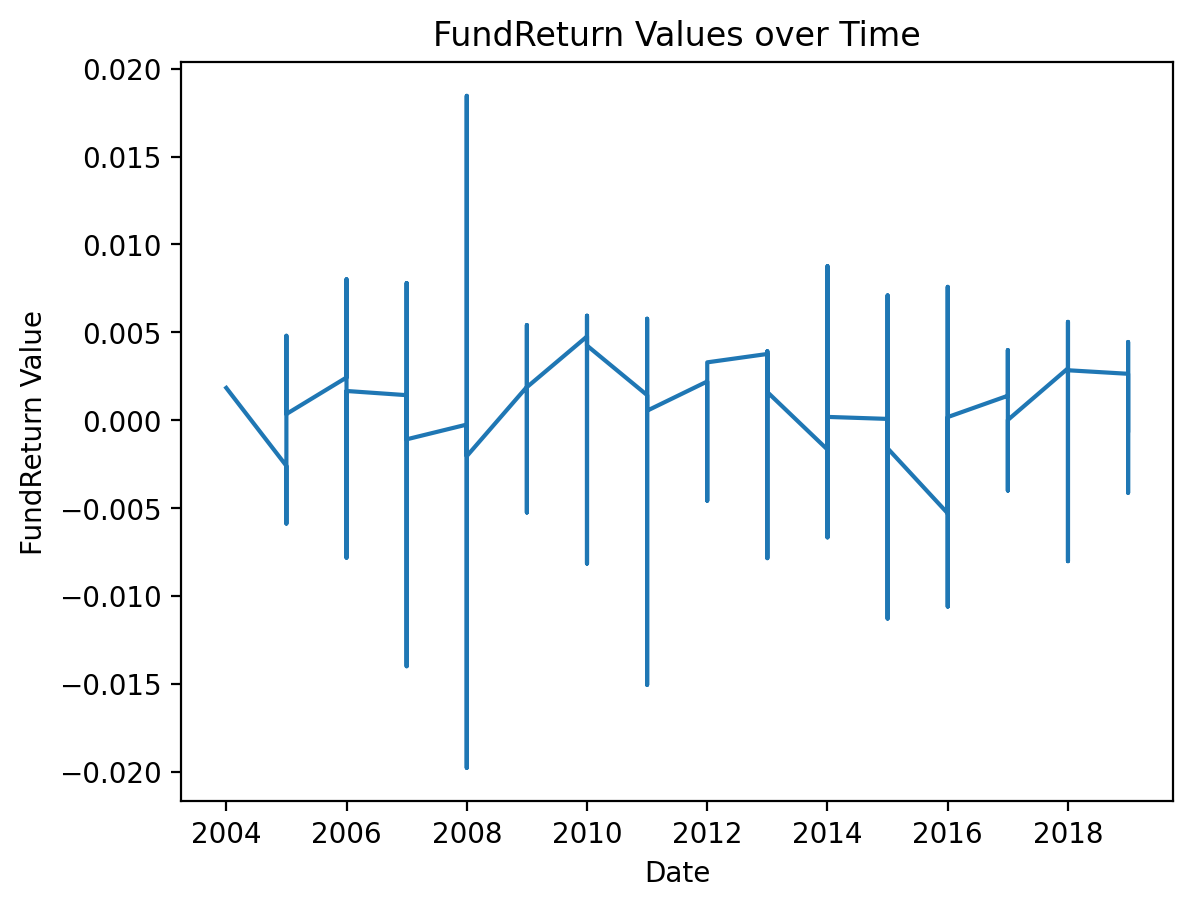

In [595]:
plt.plot(X_train['Date_year'], X_train['FundReturn'])
plt.xlabel('Date')
plt.ylabel('FundReturn Value')
plt.title('FundReturn Values over Time')
plt.show()

In [597]:
X_train = X_train[X_train['Date_year'] != 2008]

In [598]:
y_train=X_train['FundReturn']

* Add financial variables

In [599]:
#X_train.set_index('Date')

# Create a lag variable for the FundReturn with a lag of one month
#X_train['FundReturn_Lag1'] = X_train['FundReturn'].shift(1)

# Create a lag variable for the FundReturn with a lag of two months
#X_train['FundReturn_Lag2'] = X_train['FundReturn'].shift(2)
# Drop the rows with missing values (NaN) in the lag variables
#X_train.dropna(subset=['FundReturn_Lag1', 'FundReturn_Lag2'], inplace=True)

* calculate the average return, standard deviation, and correlation with other factors for each Bonds factor :

In [600]:
Bond_cols = [col for col in X_train.columns if 'Bond' in col]

# Calculate average return and standard deviation for each equity factor
X_train['Bond_avg_return'] = X_train[Bond_cols].mean(axis=1)
X_train['Bond_std_deviation'] = X_train[Bond_cols].std(axis=1)

# Create a new feature that calculates the average return for a portfolio of US and Japan equity factors
#X_train['us_japan_portfolio'] = (X_train['US'] + X_train['Japan']) / 2

* calculate the average return, standard deviation, and correlation with other factors for each Equities factor :

In [601]:
equity_cols = [col for col in X_train.columns if 'Equities' in col]
# Calculate average return and standard deviation for each interest rates factor
X_train['Equities_avg_return'] = X_train[equity_cols].mean(axis=1)
X_train['Equities_std_deviation'] = X_train[equity_cols].std(axis=1)

# Create a new feature that calculates the average return for a portfolio of European and US High Yield bond indexes
#X_train['europe_us_high_yield_portfolio'] = (X_train['European High Yield Bonds'] + X_train['US High Yield Bonds']) / 2

* calculate the average return, standard deviation, and correlation with other factors for each Foreign factor :

In [602]:
FX_cols = [col for col in X_train.columns if 'FX' in col]
# Calculate average return and standard deviation for each foreign exchange factor
X_train['FX_avg_return'] = X_train[FX_cols].mean(axis=1)
X_train['FX_std_deviation'] = X_train[FX_cols].std(axis=1)

# Create a new feature that calculates the average return for a portfolio of all foreign exchange factors
#X_train['all_fx_portfolio'] = X_train[FX_cols].mean(axis=1)

* calculate the average return, standard deviation, and correlation with other factors for each commodity index :

In [603]:
# Extract the commodity index columns and the returned refund column
#commodity_cols = ['BCOM Gold', 'Oil Brent','Copper']

# Calculate the average return of all the commodity indexes
#X_train['comm_avg_return']  = X_train[commodity_cols].mean(axis=1)

# Calculate the standard deviation of all the commodity indexes
#X_train['comm_std_deviation'] = X_train[commodity_cols].std(axis=1)

In [604]:
# Create a new variable that represents the difference between the average return of the equity factors and the average yield of the interest rates factors
X_train['equity_yield_diff'] = X_train['Equities_avg_return'] - X_train['Bond_avg_return']

X_train['fx_yield_diff'] = X_train['FX_avg_return'] - X_train['Bond_avg_return']

* Calculating the rolling average 

In [606]:
#rolling_cols=list(test.columns)
#rolling_cols.remove('Date')
rolling_cols=['US Tech Equities', 'US Equities', 'Euro Equities', 'Oil Brent']

In [607]:
rolling_cols

['US Tech Equities', 'US Equities', 'Euro Equities', 'Oil Brent']

In [608]:
X_train.set_index('Date', inplace=True)
for factor in rolling_cols :
        X_train[f'{factor}_rolling_avg_5d'] = X_train[factor].rolling(window=5).mean()
        X_train[f'{factor}_rolling_std_5d'] = X_train[factor].rolling(window=5).std()
        X_train[f'{factor}_rolling_avg_15d'] = X_train[factor].rolling(window=15).mean()
        X_train[f'{factor}_rolling_std_15d'] = X_train[factor].rolling(window=15).std()
        X_train[f'{factor}_rolling_avg_30d'] = X_train[factor].rolling(window=30).mean()
        X_train[f'{factor}_rolling_std_30d'] = X_train[factor].rolling(window=30).std()
X_train.reset_index()
X_train.fillna(0, inplace=True)
X_train= X_train.replace([np.inf, -np.inf], 0)

* Lagging features: You can create lagging features by shifting the percentage change values forward or backward in time. This can be useful to capture the effect of past price movements on future movements.

In [609]:
for factor in rolling_cols :
        X_train[f'{factor}_percentage_change_lag5'] = X_train[factor].shift(5)
        X_train[f'{factor}_percentage_change_lag15'] = X_train[factor].shift(15)
        X_train[f'{factor}_percentage_change_lag15'] = X_train[factor].shift(15)
X_train.reset_index()
X_train.fillna(0, inplace=True)
X_train= X_train.replace([np.inf, -np.inf], 0)

* Momentum features: You can create momentum features by calculating the rate of change or the difference between the current and past percentage change values. This can be useful to capture the trend and acceleration of price movements.

In [610]:
X_train

,US Tech Equities,US Equities,Japan Equities,Euro Equities,UK Equities,EM Equities,US 2Y Bond,US 10Y Bond,Germany 10Y Bond,UK 10Y Bond,...,Oil Brent_rolling_avg_15d,Oil Brent_rolling_std_15d,US Tech Equities_percentage_change_lag5,US Tech Equities_percentage_change_lag15,US Equities_percentage_change_lag5,US Equities_percentage_change_lag15,Euro Equities_percentage_change_lag5,Euro Equities_percentage_change_lag15,Oil Brent_percentage_change_lag5,Oil Brent_percentage_change_lag15
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-31,0.000307,-0.000824,0.000000,0.000000,-0.003117,0.000000,0.000671,0.002378,0.000000,0.003149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-03,-0.007984,-0.006179,0.000000,0.008480,0.000000,0.000000,-0.000447,-0.000558,0.002952,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-04,-0.020426,-0.012642,0.005226,-0.003027,0.007712,-0.011075,-0.001790,-0.004189,-0.000757,0.000628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-05,-0.010744,-0.006507,-0.009532,0.000674,-0.005689,-0.014442,-0.000150,0.000000,0.000421,-0.001434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-06,-0.001597,0.004226,0.004375,0.005058,0.001664,-0.013244,0.000597,0.000701,0.001094,0.002244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000204,0.000009,0.000420,0.000000,0.001873,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006256,0.010102,0.000251,-0.007113,-0.000048,-0.007403,-0.007308,-0.004528,0.010603,-0.002176
2019-12-26,0.008403,0.004331,0.002946,0.000000,0.000000,0.005130,0.000254,0.001402,0.000000,0.000000,...,0.004616,0.006860,0.001304,0.005068,0.000569,0.006918,-0.000636,0.012742,0.001096,0.033384
2019-12-27,-0.000656,-0.000040,0.000420,0.000950,0.001099,0.002245,0.000508,0.001887,-0.000320,0.000607,...,0.004481,0.006912,0.006016,0.001201,0.003199,0.001045,-0.001253,-0.001242,0.005005,0.003084


In [611]:
#X_train=X_train.drop(columns=['Date'])

In [612]:
X_train=X_train.drop(columns=['FundReturn'])

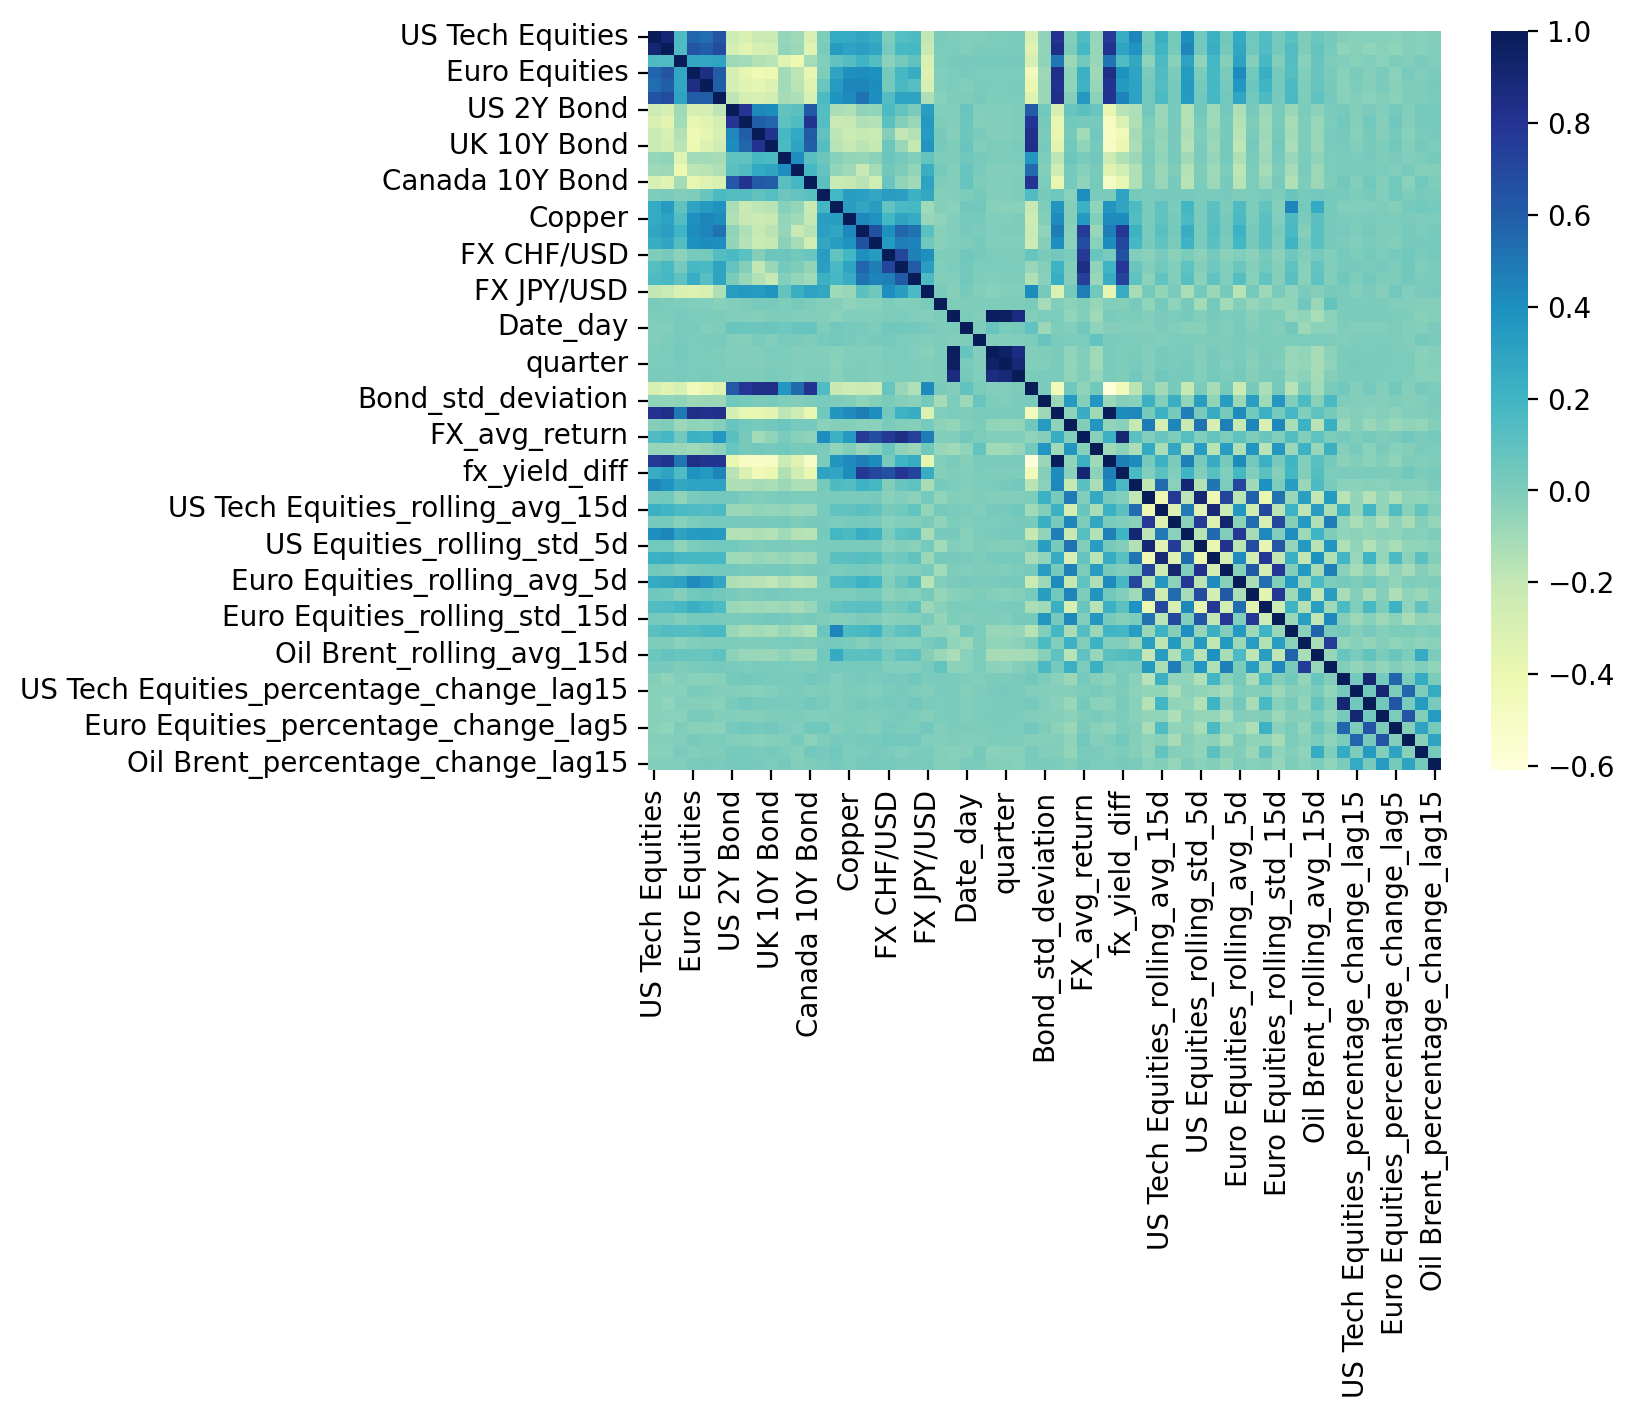

In [613]:
corr_matrix = X_train.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Set a correlation threshold
corr_threshold = 0.9
# Identify highly correlated variables
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

In [614]:
highly_correlated

{'Date_week',
 'US Equities',
 'US Equities_percentage_change_lag15',
 'US Equities_percentage_change_lag5',
 'US Equities_rolling_avg_5d',
 'US Equities_rolling_std_15d',
 'US Equities_rolling_std_5d',
 'equity_yield_diff',
 'fx_yield_diff',
 'quarter'}

In [615]:
X_train = X_train.drop(columns=highly_correlated)

In [616]:
len(X_train.columns)

51

In [617]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train,
                      test_size = 0.2, shuffle=False, random_state = 123)

### Lasso

In [618]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# create the lasso regression object with regularization parameter alpha
lasso = linear_model.LassoCV(alphas=[0.001,10], cv=5)

# fit the model to the training data
lasso.fit(train_X, train_y)

# make predictions on the test data
y_pred = lasso.predict(test_X)

# calculate the mean squared error
# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.001837


#### ridge regression

In [619]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
# create the ridge regression object with regularization parameter alpha
ridge = linear_model.Ridge(alpha=0.1)


# perform cross-validation with 5 folds
cv_scores = cross_val_score(ridge, train_X, train_y, cv=5, scoring='neg_mean_squared_error')

# print the mean squared error for each fold
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))


# define the range of hyperparameter values to test
param_grid = {'alpha': [0.01, 0.1,0.5,0.0001,1, 10, 100]}

# perform grid search with cross-validation
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(train_X, train_y)

# print the best hyperparameters
print("Best hyperparameters: {}".format(grid.best_params_))


# fit the model to the training data with the best hyperparameters
ridge_best = grid.best_estimator_
ridge_best.fit(train_X, train_y)

# make predictions on the test data
y_pred = ridge_best.predict(test_X)

# calculate the mean squared error
# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred)) 
print("RMSE : % f" %(rmse))

Cross-validation scores: [-1.90775034e-06 -4.21825812e-06 -1.98835027e-06 -1.38580051e-06
 -1.99406973e-06]
Average cross-validation score: -0.00
Best hyperparameters: {'alpha': 0.1}
RMSE :  0.001277


In [620]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid to search
param_grid = {'alpha': [0.1,0.001, 1.0, 10.0, 100.0]}

# Define the Ridge regressor model
model = Ridge()

# Define the k-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the grid search object
grid = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid.fit(train_X, train_y)

# Get the best model and print the parameters
ridge_model = grid.best_estimator_
print('Best parameters:', grid.best_params_)

# Evaluate the best model on the test data
y_pred = ridge_model.predict(test_X)


# calculate the mean squared error
# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred)) 
print("RMSE : % f" %(rmse))

Best parameters: {'alpha': 0.001}
RMSE :  0.001288


#### Linear regression

In [621]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a linear regression model and fit it to the data
Lreg = LinearRegression()

Lreg.fit(train_X, train_y)


y_pred = Lreg.predict(test_X)


# calculate the mean squared error
# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.001293


In [622]:
# Define the hyperparameters to search over
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

# Define the linear regression model
lr = LinearRegression()

# Define the grid search with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(lr, param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(train_X, train_y)

# Print the best hyperparameters and their corresponding mean test score
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean test score:", np.sqrt(-grid_search.best_score_))

# Train a final model using the optimal hyperparameters on the entire training set
lr_final = LinearRegression(fit_intercept=grid_search.best_params_['fit_intercept'], 
                            normalize=grid_search.best_params_['normalize'])
lr_final.fit(train_X, train_y)

# Evaluate the final model on the test set
y_pred = lr_final.predict(test_X)

Best hyperparameters: {'fit_intercept': False, 'normalize': True}
Best mean test score: 0.0015329594763624956


### XGBOOST

In [623]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 50, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[20:58:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.001335


* XGBoost + GS + CV

In [512]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
model = XGBRegressor()

# Define the hyperparameters to search over
hyperparameters = {'max_depth': [2, 4, 6],
                   'learning_rate': [0.1, 0.01,0.005],
                   'n_estimators': [100, 500]}

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(model, hyperparameters, cv=cv, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance of the best model using k-fold cross-validation
best_model_xgb = grid_search.best_estimator_
scores = cross_val_score(best_model_xgb, train_X, train_y, cv=cv, scoring='neg_mean_squared_error')
print("Mean RMSE of the best model: ", np.mean(np.sqrt(-scores)))
  
# Predict the model
pred = best_model_xgb.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
Mean RMSE of the best model:  0.001475185777156654
RMSE :  0.001321


* XGBoost + RandomizedSearchCV + CV

In [513]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search over
param_grid = {
    "n_estimators": np.arange(50, 500, 50),
    "max_depth": np.arange(3, 10),
    "learning_rate": np.logspace(-4, -1, 4),
    "subsample": np.arange(0.5, 1.0, 0.1),
    "colsample_bytree": np.arange(0.5, 1.0, 0.1),
    "reg_alpha": np.logspace(-4, -1, 4),
    "reg_lambda": np.logspace(-4, -1, 4)
}

# Create the XGBoost regressor
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)


# Create the randomized search object
random_search = RandomizedSearchCV(
    xgb, param_grid, n_iter=100, scoring="neg_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, random_state=42
)

# Fit the randomized search object to the data
random_search.fit(train_X, train_y)


# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean squared error: ", -random_search.best_score_)

# Evaluate the best model on the test set
best_model_xgrandom = random_search.best_estimator_
y_pred = best_model_xgrandom.predict(test_X)


# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))


Best hyperparameters:  {'subsample': 0.8999999999999999, 'reg_lambda': 0.1, 'reg_alpha': 0.001, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Best mean squared error:  2.075600270246626e-06
RMSE :  0.001324


### LightGBM

In [530]:
from numpy import std
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean

In [531]:
Lgbm_r = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(Lgbm_r, train_X, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset

Lgbm_r.fit(train_X, train_y)

# Predict the model
Lgbm_pred = Lgbm_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, Lgbm_pred))
print("RMSE : % f" %(rmse))

MAE: -0.001 (0.000)
RMSE :  0.001323


* lightgbm+cv+GS

In [516]:
from sklearn.model_selection import GridSearchCV, KFold
from lightgbm import LGBMRegressor

# Create LightGBM regressor
lgbm = LGBMRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [2, 4, 6,8,10],
    'learning_rate': [0.05, 0.1, 0.2,0.005,0.001],
    'num_leaves': [10, 20, 30,50,70],
}

# Create GridSearchCV object
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# Fit the grid search object on the data
grid.fit(train_X, train_y)

# Get the best estimator found by GridSearchCV
best_estimator = grid.best_estimator_


print(best_estimator)

# Perform cross-validation on the best estimator
cv_scores = cross_val_score(best_estimator, train_X, train_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)



# Make predictions using the best estimator
y_pred = best_estimator.predict(test_X)

# Compute the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(test_y, y_pred))

# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))

KeyboardInterrupt: 

* lightGBM+randomsearchcv+kfolds

In [ ]:
# Define the parameter grid to search over
param_grid = {
    "n_estimators": np.arange(50, 500, 50),
    "max_depth": np.arange(3, 10),
    "learning_rate": np.logspace(-4, -1, 4),
    "subsample": np.arange(0.5, 1.0, 0.1),
    "colsample_bytree": np.arange(0.5, 1.0, 0.1),
    "reg_alpha": np.logspace(-4, -1, 4),
    "reg_lambda": np.logspace(-4, -1, 4)
}

# Create the XGBoost regressor
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Create the randomized search object
random_search = RandomizedSearchCV(
    xgb, param_grid, n_iter=100, scoring="neg_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, random_state=42
)

# Fit the randomized search object to the data
random_search.fit(train_X, train_y)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean squared error: ", -random_search.best_score_)


# Evaluate the best model on the test set
best_model_xgrandom = random_search.best_estimator_
y_pred = best_model_xgrandom.predict(test_X)


# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))

* using halving 

* Using Bayesian optimization 

In [533]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define hyperparameter space
# Define the search space for the Bayesian optimization
search_spaces = {
    'n_estimators': Integer(100, 1000),
    'learning_rate': Real(0.01, 0.5),
    'max_depth': Integer(1, 10),
    'num_leaves': Integer(10, 100),
    'subsample': Real(0.1, 1.0),
    'colsample_bytree': Real(0.1, 1.0),
    'reg_alpha': Real(0.1, 10.0),
    'reg_lambda': Real(0.1, 10.0)
}

# Define the LightGBM regressor
model = lgb.LGBMRegressor()

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the BayesSearchCV object
opt = BayesSearchCV(model, search_spaces, cv=cv, n_iter=50, n_jobs=-1, verbose=1)

# Fit the BayesSearchCV object on the data
opt.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
#print("Best score:", opt.best_score_)
#print("Best hyperparameters:", opt.best_params_)


# Get the best estimator from the BayesSearchCV object
model_bayesian = opt.best_estimator_

# Make predictions using the best model
y_pred = model_bayesian.predict(test_X)


# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Stacking

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

X=X_train.copy()
y=y_train.copy()
# Initialize the base models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid for the base models
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [5, 10, 15]}
gb_param_grid = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.05, 0.1, 0.2]}

# Initialize the meta model
lr = LinearRegression()

# Define the number of folds for cross-validation
n_folds = 5

# Initialize the cross-validation folds
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize the arrays for storing the predictions and targets for the meta model
meta_X = np.zeros((X.shape[0], 2))
meta_y = np.zeros((X.shape[0], ))

# Train the base models and make predictions for the meta model using KFold cross-validation and Grid search
for train_idx, test_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Perform Grid search on the base models
    rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=kf)
    rf_grid_search.fit(X_train, y_train)
    rf_best_model = rf_grid_search.best_estimator_

    gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=kf)
    gb_grid_search.fit(X_train, y_train)
    gb_best_model = gb_grid_search.best_estimator_

    meta_X[test_idx, 0] = rf_best_model.predict(X_test)
    meta_X[test_idx, 1] = gb_best_model.predict(X_test)
    meta_y[test_idx] = y_test

# Perform Grid search on the meta model
meta_param_grid = {'fit_intercept': [True, False]}
lr_grid_search = GridSearchCV(estimator=lr, param_grid=meta_param_grid, cv=kf)
lr_grid_search.fit(meta_X, meta_y)
lr_best_model_stacking = lr_grid_search.best_estimator_



# Make predictions using the best model
y_pred = lr_best_model_stacking.predict(test_X)


# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))


### Voting Method

In [ ]:
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
import lightgbm as lgb


# Define the voting ensemble model
ensemble_model = VotingRegressor([('xgb', best_model_xgrandom), ('lgb', best_estimator),('bay',model_bayesian)])

# Train the voting ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
y_pred = ensemble_model.predict(test_X)


# RMSE Computation
rmse = np.sqrt(MSE(test_y, y_pred))
print("RMSE : % f" %(rmse))


### Test submission

In [624]:
X_test=test.copy()
# Converting to datetime datatype
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date_year'] = X_test['Date'].dt.year
X_test['Date_month'] = X_test['Date'].dt.month
#X_train['Date_month_name'] = X_train['Date'].dt.month_name()
X_test['Date_day'] = X_test['Date'].dt.day
X_test['Date_dow'] = X_test['Date'].dt.dayofweek
#X_train['Date_dow_name'] = X_train['Date'].dt.day_name
#X_train['Date_is_weekend'] = np.where(X_train['Date_dow_name'].isin(['Sunday', 'Saturday']),1,0)
X_test['Date_week'] = X_test['Date'].dt.week
X_test['quarter'] = X_test['Date'].dt.quarter
X_test['semester'] = np.where(X_test['quarter'].isin([1,2]), 1, 2)

In [626]:
Bond_cols = [col for col in X_test.columns if 'Bond' in col]

# Calculate average return and standard deviation for each equity factor
X_test['Bond_avg_return'] = X_test[Bond_cols].mean(axis=1)
X_test['Bond_std_deviation'] = X_test[Bond_cols].std(axis=1)

# Create a new feature that calculates the average return for a portfolio of US and Japan equity factors
#X_train['us_japan_portfolio'] = (X_train['US'] + X_train['Japan']) / 2

equity_cols = [col for col in X_test.columns if 'Equities' in col]
# Calculate average return and standard deviation for each interest rates factor
X_test['Equities_avg_return'] = X_test[equity_cols].mean(axis=1)
X_test['Equities_std_deviation'] = X_test[equity_cols].std(axis=1)



FX_cols = [col for col in X_test.columns if 'FX' in col]
# Calculate average return and standard deviation for each foreign exchange factor
X_test['FX_avg_return'] = X_test[FX_cols].mean(axis=1)
X_test['FX_std_deviation'] = X_test[FX_cols].std(axis=1)

# Create a new feature that calculates the average return for a portfolio of all foreign exchange factors
#X_test['all_fx_portfolio'] = X_test[FX_cols].mean(axis=1)



# Extract the commodity index columns and the returned refund column
#commodity_cols = ['BCOM Gold', 'Oil Brent','Copper']

# Calculate the average return of all the commodity indexes
#X_test['comm_avg_return']  = X_test[commodity_cols].mean(axis=1)

# Calculate the standard deviation of all the commodity indexes
#X_test['comm_std_deviation'] = X_test[commodity_cols].std(axis=1)

# Create a new variable that represents the difference between the average return of the equity factors and the average yield of the interest rates factors
X_test['equity_yield_diff'] = X_test['Equities_avg_return'] - X_test['Bond_avg_return']

X_test['fx_yield_diff'] = X_test['FX_avg_return'] - X_test['Bond_avg_return']

In [627]:
X_test.set_index('Date', inplace=True)
for factor in rolling_cols:
        X_test[f'{factor}_rolling_avg_5d'] = X_test[factor].rolling(window=5).mean()
        X_test[f'{factor}_rolling_std_5d'] = X_test[factor].rolling(window=5).std()
        X_test[f'{factor}_rolling_avg_15d'] = X_test[factor].rolling(window=15).mean()
        X_test[f'{factor}_rolling_std_15d'] = X_test[factor].rolling(window=15).std()
X_test.reset_index()
X_test.fillna(0, inplace=True)

In [628]:
for factor in rolling_cols :
        X_test[f'{factor}_percentage_change_lag5'] = X_test[factor].shift(5)
        X_test[f'{factor}_percentage_change_lag15'] = X_test[factor].shift(15)
X_test.reset_index()
X_test.fillna(0, inplace=True)
X_test= X_test.replace([np.inf, -np.inf], 0)

In [629]:
X_test = X_test.drop(columns=highly_correlated)

In [630]:
len(X_test.columns)

51

In [543]:
model_bayesian_pred=model_bayesian.predict(X_test)
solution = pd.DataFrame({"Date":test.Date, "FundReturn":model_bayesian_pred})
solution.to_csv("submission_model_bayesian.csv", index = False)

In [633]:
ridge_lreg_pred=0.7*ridge_best.predict(X_test)+0.3*Lreg.predict(X_test)
solution = pd.DataFrame({"Date":test.Date, "FundReturn":ridge_lreg_pred})
solution.to_csv("submission_ridge_lreg.csv", index = False)

In [545]:
#Predict the model
ensemble_model_pred=ensemble_model.predict(X_test)
model_bayesian_pred=model_bayesian.predict(X_test)
best_model_xgrandom_pred=best_model_xgrandom.predict(X_test)
best_model_xgb_pred=best_model_xgb.predict(X_test)
lr_final_pred=lr_final.predict(X_test)
Lreg_pred=Lreg.predict(X_test)
best_pred=best_estimator.predict(X_test)
ridge_pred=ridge_best.predict(X_test)
xgb_pred = xgb_r.predict(X_test)
Lgbm_pred=Lgbm_r.predict(X_test)
solution = pd.DataFrame({"Date":test.Date, "FundReturn":lr_final_pred})
solution.to_csv("submission_Lihtgbm.csv", index = False)

NameError: name 'ensemble_model' is not defined